<h2>Subject: Computer Vision I


Group: 3

Authors: Angel Ontiveros, Lassi Laaksosaari

Exercise 3 </h2>

## Task 1

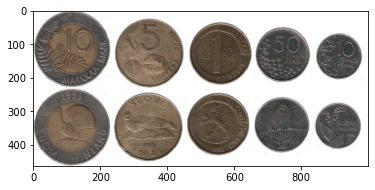

In [166]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

coins_img_path = "./coins.jpg"
coins_img = imread(coins_img_path)

plt.imshow(coins_img)


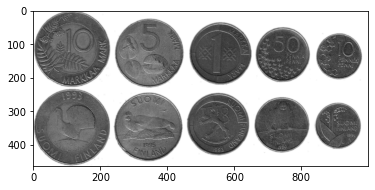

In [167]:
coins_img_gray = rgb2gray(coins_img)
plt.imshow(coins_img_gray, cmap="gray")

In [168]:
res_mm_per_pixel = 0.12
factor = 0.12*2
def calc_coins_radius():
    coins_radii = {
        "10": 27.25/factor,
        "5": 24.50/factor,
        "1": 22.25/factor,
        "0.5": 19.70/factor,
        "0.1": 16.30/factor
    }
    return coins_radii

coins_radii = calc_coins_radius()
print(coins_radii)

{'10': 113.54166666666667, '5': 102.08333333333334, '1': 92.70833333333334, '0.5': 82.08333333333333, '0.1': 67.91666666666667}


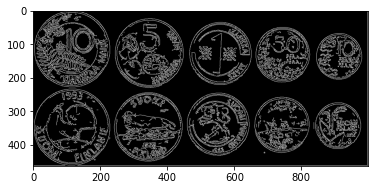

In [169]:
from skimage.feature import canny

canny_edges = canny(coins_img_gray)
plt.imshow(canny_edges, cmap="gray")

In [170]:
from skimage.transform import hough_circle

hough_circle_res = hough_circle(image=canny_edges, radius=list(coins_radii.values()))

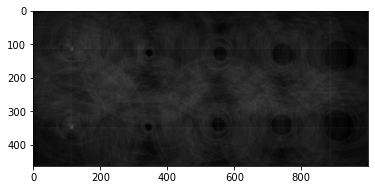

In [171]:
plt.imshow(hough_circle_res[0], cmap='gray')

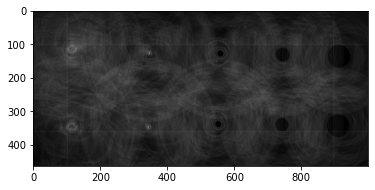

In [172]:
plt.imshow(hough_circle_res[1], cmap='gray')

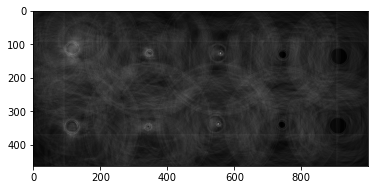

In [173]:
plt.imshow(hough_circle_res[2], cmap='gray')

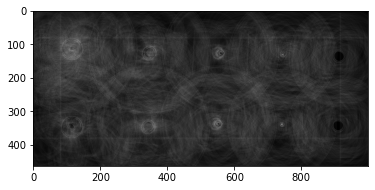

In [174]:
plt.imshow(hough_circle_res[3], cmap='gray')

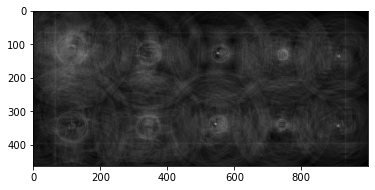

In [175]:
plt.imshow(hough_circle_res[4], cmap='gray')

In [176]:
from skimage.transform import hough_circle_peaks

accums, cx, cy, radii =  hough_circle_peaks(hspaces=hough_circle_res, radii=list(coins_radii.values()), num_peaks=2, normalize=True)

[]

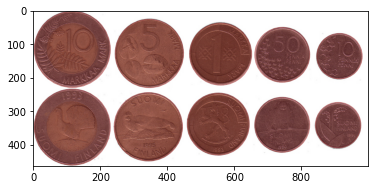

In [184]:
from matplotlib.patches import Circle

fig, ax = plt.subplots()

for i in range(len(radii)):
    patch = Circle(xy=(cx[i], cy[i]), radius=radii[i], alpha=0.4, color="brown")
    ax.add_patch(patch)

ax.imshow(coins_img)
plt.plot()